In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
try:
    import contractions
    print('imported')
except:
    !pip install contractions
    import contractions
    print('Installed and imported')
from tqdm import tqdm
import unidecode
try:
    from word2number import w2n
    print('imported')
except:
    !pip install word2number
    from word2number import w2n
    print('Installed and imported')
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

     |████████████████████████████████| 283 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 321 kB 2.8 MB/s eta 0:00:01
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=102919 sha256=9353adc52b2159f7f141b0f078cd554e3e6fbf6124f830d646dd7647e81fe262
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick
Installed and imported
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5586 sha256=3c91d584f2cccabe6f2c9c8282f8c6f3afe5884dfcc094613b22165cfb5a2aaa
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number
Installed and imported


In [2]:
df = pd.read_csv('../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


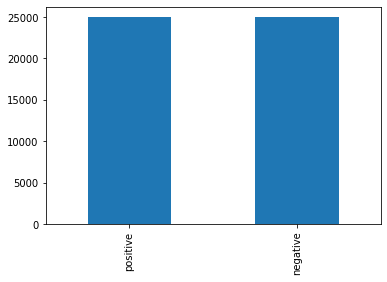

In [4]:
df['sentiment'].value_counts().plot.bar()
plt.show()

In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df['sentiment'].value_counts()#balanced

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [8]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [9]:
#Helper functions
def tag_remover(text):
    clean_text = re.compile('<.*?>')
    clean_text = re.sub(clean_text,'',text)
    return clean_text
def unicode_remover(text):
    cleaned_text = unidecode.unidecode(text)
    return cleaned_text
# def convert_to_num(text):
#     processed = [w2n.word_to_num(token.text) if token.pos_ == 'NUM' else token for token in text]
#     return processed
def expand(text):
    expanded_text = contractions.fix(text)
    return expanded_text

In [10]:
final_reviews = []
snowball = SnowballStemmer(language = 'english')
def cleaner(df):
    for text in tqdm(df['review']):
        review = re.sub("[^a-zA_Z]"," ",text)
        review = tag_remover(text)
        review = unicode_remover(review)
        review = expand(review)
        review = word_tokenize(review.lower())
        #review = [w2n.word_to_num(token.text) if token.pos_ == 'NUM' else token for token in review]
        cleaned_review = [snowball.stem(i) for i in review]
        cleaned_review = " ".join(cleaned_review)
        final_reviews.append(cleaned_review)
    return final_reviews

In [11]:
review = cleaner(df)

100%|██████████| 50000/50000 [04:39<00:00, 179.04it/s]


In [12]:
len(review)

50000

In [13]:
type(review)

list

In [14]:
df['cleaned_review'] = review

In [15]:
review[0:5]

['one of the other review has mention that after watch just 1 oz episod you will be hook . they are right , as this is exact what happen with me.th first thing that struck me about oz was it brutal and unflinch scene of violenc , which set in right from the word go . trust me , this is not a show for the faint heart or timid . this show pull no punch with regard to drug , sex or violenc . it is hardcor , in the classic use of the word.it is call oz as that is the nicknam given to the oswald maximum secur state penitentari . it focus main on emerald citi , an experiment section of the prison where all the cell have glass front and face inward , so privaci is not high on the agenda . them citi is home to many..aryan , muslim , gangsta , latino , christian , italian , irish and more ... .so scuffl , death stare , dodgi deal and shadi agreement are never far away.i would say the main appeal of the show is due to the fact that it goe where other show would not dare . forget pretti pictur pa

In [16]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one of the other review has mention that after...
1,A wonderful little production. <br /><br />The...,positive,a wonder littl product . the film techniqu is ...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonder way to spend time ...
3,Basically there's a family where a little boy ...,negative,basic there is a famili where a littl boy ( ja...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei 's `` love in the time of money ...


In [17]:
df['cleaned_review'][0:5]

0    one of the other review has mention that after...
1    a wonder littl product . the film techniqu is ...
2    i thought this was a wonder way to spend time ...
3    basic there is a famili where a littl boy ( ja...
4    petter mattei 's `` love in the time of money ...
Name: cleaned_review, dtype: object

In [18]:
vocab_size = 10000
def tokenizer_funct(review):
    tokenizer = Tokenizer(num_words = vocab_size)
    tokenizer.fit_on_texts(review)
    tokenized_reviews = tokenizer.texts_to_sequences(review)
    return tokenized_reviews

In [19]:
tokenized_reviews = tokenizer_funct(review)

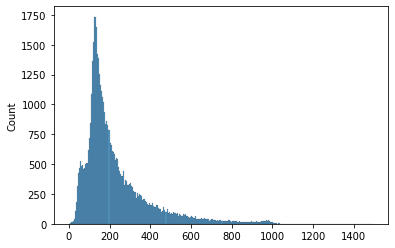

In [20]:
review = [len(review) for review in tokenized_reviews]
sns.histplot(review,bins=np.arange(0,1500,5))
plt.show()

In [21]:
def padding(tokenized_reviews):
    X = pad_sequences(tokenized_reviews,maxlen = 500,padding = 'post',truncating='post')
    return X

In [22]:
X = padding(tokenized_reviews)
print(len(X[1]))

500


In [23]:
X[2]

array([   9,  191,   10,   14,    3,  209,  105,    6,  774,   51,   22,
          3,  111,  889, 1433, 2298,  538,    8,    1,  751, 1922,  653,
          2,   60,    3,  459,  442,  203,    1,  118,    5, 3513,   19,
          1,  448,    5, 1832,    2,    1,   58,   23, 1483,   65,    1,
         76, 5007, 1167, 1399,  476,  154,   52,  218,   24,  414,   55,
         32,  565,   10,    5,   12,  838,  181,  254, 2105, 1833,    9,
        191,    7,   14, 2649,   11, 2576, 1724,    5,  142, 1422,    8,
        915,    4,    1,  450,  121,    4,  160,   20, 1952,    6,   96,
        405,   14,    1,   87,    9,   50,  245,   30,   29,    4, 2576,
         26,  203,    8,  125, 1608,    9,  114,    3, 1269,  154,    9,
         20,  127,   94,  504,   18, 6541,    8,   10,   63,  479,    6,
       1114,  192,   43, 1267,   25,  733,    2,  986,  204,   98,    3,
        899,   19,  901,  208,  271,  405,  218,   12,   24,    1, 4486,
       3380,    4,   28,  604,   19,    7,   14,   

In [24]:
def encoder_funct(df):
    encode_y = LabelEncoder()
    y = encode_y.fit_transform(df['sentiment'])
    return y
y = encoder_funct(df)

In [25]:
print(y[0:5])
print(y.shape)

[1 1 1 0 1]
(50000,)


In [26]:
#Model
inputlayer = tf.keras.layers.Input(shape = 500)
embeddinglayer = tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = 64,mask_zero = True)(inputlayer)
bidirlayer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences = False))(embeddinglayer)
fclayer = tf.keras.layers.Dense(64,activation = 'relu')(bidirlayer)
dropout = tf.keras.layers.Dropout(0.2)(fclayer)
outputlayer = tf.keras.layers.Dense(1,activation = 'sigmoid')(dropout)
model = Model(inputs = inputlayer,outputs = outputlayer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 64)           640000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 714,369
Trainable params: 714,369
Non-trainable params: 0
_______________________________________________________

In [27]:
optimiser = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer = optimiser,loss = 'binary_crossentropy',metrics = ['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 3)
history = model.fit(X,y,batch_size = 32,validation_split = 0.2,epochs = 2,callbacks = [callback])

Epoch 1/2
1250/1250 [==============================] - 72s 52ms/step - loss: 0.5865 - accuracy: 0.6605 - val_loss: 0.2930 - val_accuracy: 0.8802
Epoch 2/2
1250/1250 [==============================] - 63s 50ms/step - loss: 0.2431 - accuracy: 0.9070 - val_loss: 0.2724 - val_accuracy: 0.8899


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

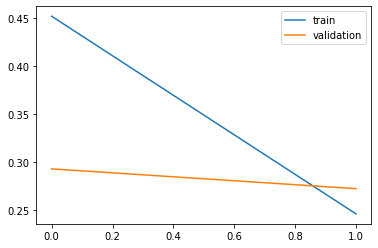

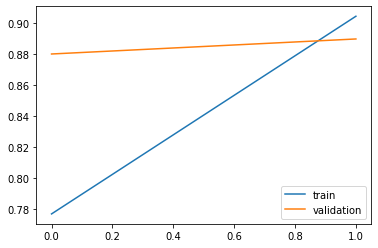

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'],loc = 'upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'],loc = 'lower right')
plt.show()